# Model with pycaret

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

Load and prepare the data



In [ ]:
data = pd.read_csv("tips.csv")

In [ ]:
data.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [ ]:
set(data['day'])

{'Fri', 'Sat', 'Sun', 'Thur'}

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [ ]:
data.describe()
# there is no null data, but there are some features that are irrelevant to our task.

,total_bill,tip,size,price_per_person,CC Number
count,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,19.785943,2.998279,2.569672,7.888197,2.563496e+15
std,8.902412,1.383638,0.951100,2.914234,2.369340e+15
min,3.070000,1.000000,1.000000,2.880000,6.040679e+10
25%,13.347500,2.000000,2.000000,5.800000,3.040731e+13
50%,17.795000,2.900000,2.000000,7.255000,3.525318e+15
75%,24.127500,3.562500,3.000000,9.390000,4.553675e+15
max,50.810000,10.000000,6.000000,20.270000,6.596454e+15


In [ ]:
# drop some irrelvant feature
data = data.drop('Payer Name', axis = 1)
data = data.drop('CC Number', axis = 1)
data = data.drop('Payment ID', axis = 1)

In [ ]:
# add weekday as another feature and remove day
data["weekday"] = data["day"].map({"Thur": "Yes", "Fri": "Yes", "Sat": "No", "Sun": "No"})
data = data.drop('day', axis = 1)

# add tip percentage as another feature and remove tip
data['tip_percentage'] = 100 * (data['tip'] / data['total_bill'])
data['tip_percentage'] = np.round(data['tip_percentage'], decimals = 2)
data = data.drop('tip', axis = 1)

# also, price per person is redundant, since it is total/size
data = data.drop('price_per_person', axis = 1)

data.describe()

,total_bill,size,tip_percentage
count,244.000000,244.000000,244.000000
mean,19.785943,2.569672,16.079754
std,8.902412,0.951100,6.107020
min,3.070000,1.000000,3.560000
25%,13.347500,2.000000,12.910000
50%,17.795000,2.000000,15.475000
75%,24.127500,3.000000,19.147500
max,50.810000,6.000000,71.030000


In [ ]:
figure1 = px.scatter(data_frame = data, x="total_bill",
                    y="tip_percentage", color= "weekday")
figure1.show()
# It seems that during weekend, people tend to spend more in total.

In [ ]:
figure2 = px.scatter(data_frame = data, x="total_bill",
                    y="tip_percentage", color= "time")
figure2.show()
# It seems that people tend to spend more for dinner.

Creat model

In [ ]:
!pip install --quiet pycaret
# !pip install scipy

In [ ]:
# Next, tell pycaret that we're using google colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
# !pip install pycaret


In [ ]:
# import pycaret

# try:
#   from pycaret.classification import *
# except:
#   from pycaret.classification import *


In [ ]:
from pycaret.regression import *

In [ ]:
settings = setup(data = data, 
          target = 'tip_percentage', 
          session_id = 123
          ) 

,Description,Value
0,session_id,123
1,Target,tip_percentage
2,Original Data,"(244, 7)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(170, 11)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='tip_percentage',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
top3 = compare_models(n_select = 3)
compare_model_results = pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,4.2601,41.7215,5.7774,-0.0599,0.3135,0.2897,0.010
en,Elastic Net,4.2654,41.6957,5.7810,-0.0636,0.3137,0.2899,0.010
br,Bayesian Ridge,4.2669,41.7330,5.7836,-0.0644,0.3141,0.2905,0.011
omp,Orthogonal Matching Pursuit,4.2758,41.6864,5.7897,-0.0712,0.3142,0.2902,0.011
dummy,Dummy Regressor,4.3710,46.3075,6.0116,-0.0976,0.3370,0.3108,0.008
llar,Lasso Least Angle Regression,4.3710,46.3075,6.0116,-0.0976,0.3370,0.3108,0.010
huber,Huber Regressor,4.3538,43.8021,5.9262,-0.1122,0.3189,0.2892,0.030
ridge,Ridge Regression,4.4566,43.4360,6.0105,-0.2093,0.3307,0.3056,0.009
lar,Least Angle Regression,4.4929,43.9127,6.0543,-0.2318,0.3322,0.3082,0.011
lr,Linear Regression,4.4965,44.0060,6.0649,-0.2398,0.3338,0.3083,0.324


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:[Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False), ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False), BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)]
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
stacker_top3 = stack_models(top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.0625,46.6322,6.8288,0.1775,0.2972,0.2125
1,3.9819,25.4759,5.0474,-0.2645,0.2967,0.2602
2,3.7765,23.9517,4.8940,0.2062,0.3232,0.3041
3,3.5403,17.1578,4.1422,-0.4771,0.2875,0.2301
4,8.5121,223.4825,14.9493,-0.2136,0.4848,0.3143
5,4.7313,28.7672,5.3635,-0.0692,0.3691,0.4097
6,3.0665,14.4269,3.7983,-0.1482,0.2523,0.2395
7,3.9512,21.1995,4.6043,-0.3864,0.3344,0.3626
8,3.6993,20.8272,4.5637,-0.0386,0.3208,0.3206


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:StackingRegressor(cv=5,
                  estimators=[('lasso',
                               Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                     max_iter=1000, normalize=False,
                                     positive=False, precompute=False,
                                     random_state=123, selection='cyclic',
                                     tol=0.0001, warm_start=False)),
                              ('en',
                               ElasticNet(alpha=1.0, copy_X=True,
                                          fit_intercept=True, l1_ratio=0.5,
                                          max_iter=1000, normalize=False,
                                          positive=False, precompute=Fals...
                                          tol=0.0001, warm_start=False)),
                              ('br',
               

In [ ]:
save_model(stacker_top3, "best_model")
asdf = load_model("best_model")

def predict(total_bill, sex, smoker, time, size, weekday):
    df = pd.DataFrame.from_dict({'total_bill': [total_bill], 'sex': [sex], 
                    'smoker': [smoker], 'size': [size],
                    'time': [time], 'weekday': [weekday]})
    
    pred = predict_model(asdf, df)
    return pred['Label'][0].astype('float64')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=StackingRegressor(cv=5,
                  estimators=[('lasso',
                               Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                     max_iter=1000, normalize=False,
                                     positive=False, precompute=False,
                                     random_state=123, selection='cyclic',
                                     tol=0.0001, warm_start=False)),
                              ('en',
                               ElasticNet(alpha=1.0, copy_X=True,
                                          fit_intercept=True, l1_ratio=0.5,
                                          max_iter=1000, normalize=False,
                                          positive=False, precompute=Fals...
                                          tol=0.0001, warm_start=False)),
                              ('br',
                               BayesianRidge(alpha_1=1e-06, alpha_2

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


In [ ]:
p = predict(50, 'Male', 'No', 'Dinner', '4', 'Yes')
p

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='tip_percentage',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                                                BayesianRidge(alpha_1=1e-06,
                                                              alpha_2=1e-06,
                                                            

11.873755469433021

# Model with KNN Regressor

In [3]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import *
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [4]:
data_11 = pd.read_csv("tips.csv")
data_11.info()

# there is no null data, but there are some features that are irrelevant to our task.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [5]:
# drop some irrelvant feature
data_11 = data_11.drop('Payer Name', axis = 1)
data_11 = data_11.drop('CC Number', axis = 1)
data_11 = data_11.drop('Payment ID', axis = 1)
data_11 = data_11.drop('price_per_person', axis = 1)

In [6]:
data_11["sex"] = data_11["sex"].map({"Female": 0, "Male": 1})
data_11["time"] = data_11["time"].map({"Dinner": 0, "Lunch": 1})
data_11["smoker"] = data_11["smoker"].map({"No": 0, "Yes": 1})
data_11["day"] = data_11["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})

#change tip value to percentage
data_11['tip_percentage'] = 100 * (data_11['tip'] / data_11['total_bill'])
data_11['tip_percentage'] = np.round(data_11['tip_percentage'], decimals = 2)
data_11 = data_11.drop('tip', axis = 1)


data_11.head()

,total_bill,sex,smoker,day,time,size,tip_percentage
0,16.99,0,0,3,0,2,5.94
1,10.34,1,0,3,0,3,16.05
2,21.01,1,0,3,0,3,16.66
3,23.68,1,0,3,0,2,13.98
4,24.59,0,0,3,0,4,14.68


In [7]:
# have a look at the tips given to the waiters according to:

# the total bill paid
# number of people at a table
# and the day of the week:

figure = px.scatter(data_frame = data_11, x="total_bill",
                    y="tip_percentage", size="size", color= "day", trendline="ols")
figure.show()

In [8]:
y = data_11['tip_percentage']
X = data_11.drop(['tip_percentage'], axis = 1)

print(X.shape, y.shape)

(244, 6) (244,)


In [9]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
sex,244.0,0.643443,0.479967,0.00,0.0000,1.000,1.0000,1.00
smoker,244.0,0.381148,0.486667,0.00,0.0000,0.000,1.0000,1.00
day,244.0,1.725410,1.155774,0.00,0.0000,2.000,3.0000,3.00
time,244.0,0.278689,0.449276,0.00,0.0000,0.000,1.0000,1.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [10]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [11]:
print(len(X),     
len(X_train), 
len(X_test))

244 170 74


In [12]:
# Feature Scaling for KNN Regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [14]:
y_pred = regressor.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 4.7780270270270275
mse: 73.89154481081081
rmse: 8.596019125782052


In [16]:
regressor.score(X_test, y_test)

-0.017407108415413264

In [17]:
y.describe()

count    244.000000
mean      16.079754
std        6.107020
min        3.560000
25%       12.910000
50%       15.475000
75%       19.147500
max       71.030000
Name: tip_percentage, dtype: float64

In [18]:
#Find the best k value for KNN Regression

k = 60


In [19]:
error = []


# Calculating MAE error for K values between 1 and k_value: k
for i in range(1, k):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

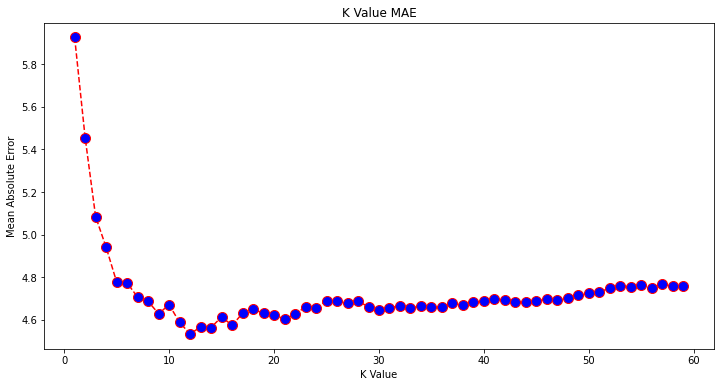

In [20]:
#plot the error for each of the k value

import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, k), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'Mean Absolute Error')

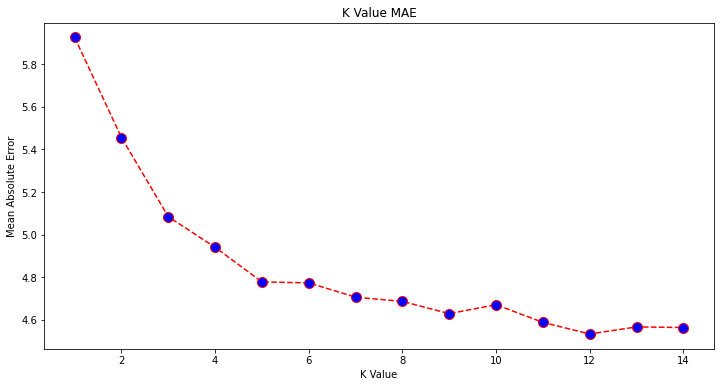

In [21]:
#The best k value happens at 12, so we plot out the first 15 values

plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error[:14], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [22]:
knn_reg7 = KNeighborsRegressor(n_neighbors = 7)
knn_reg7.fit(X_train, y_train)
y_pred7 = knn_reg7.predict(X_test)
r2 = knn_reg7.score(X_test, y_test) 

mae7 = mean_absolute_error(y_test, y_pred7)
mse7 = mean_squared_error(y_test, y_pred7)
rmse7 = mean_squared_error(y_test, y_pred7, squared=False)
print(f'r2: {r2}, \nmae: {mae7} \nmse: {mse7} \nrmse: {rmse7}')

r2: -0.009476017288450933, 
mae: 4.706389961389962 
mse: 73.31553097076669 
rmse: 8.562448888651346


In [30]:
# total_bill	sex	smoker	day	time	size

def predictNew(total_bill, sex, smoker, day, time, size):
  if time == "Lunch":
    time = 1
  else:
    time = 0

  
  if smoker == "Yes":
    smoker = 1
  else:
    smoker = 0

  if sex == "Male":
      sex = 1
  else:
      sex = 0



  if day == "Thursday":
      day= 0
  elif day == "Friday":
      day = 1 
  elif day == "Friday":
      day = 2 
  else:
      day = 3

  result_new = knn.predict([[total_bill, sex, smoker, day, time, size]])

  return result_new[0]

In [32]:
result_test = predictNew(50, "Male", "No", "Thursday", "Dinner", 4)

result_test

# result_test[0]

13.760338983050847

# GUI design

In [33]:
!pip install --quiet gradio

In [34]:
import gradio as gr

In [35]:
with gr.Blocks() as demo:
    gr.Markdown("How much to tip")
    # with gr.Tab("With AutoML"):
    #     total_bill = gr.Number(label = "Total Bill")
    #     sex = gr.CheckboxGroup(choices=['Male','Female'], label = "Person who's paying")
    #     smoker = gr.CheckboxGroup(choices=['Yes', 'No'], label="Do you have Smoker?")
    #     size = gr.Number(label = 'How many people?')
    #     time = gr.CheckboxGroup(choices=['Lunch','Dinner'], label="Which Meal?")
    #     weekday = gr.CheckboxGroup(choices=['Weekday','Weekend'], label="Is this a weekday?")

    #     button_1 = gr.Button("Predict")
    #     output_1 = gr.Textbox(label="Tip percentage")

    with gr.Tab("With KNN Regresser"):
        total_bill = gr.Number(label = "Total Bill")
        sex = gr.CheckboxGroup(choices=['Male','Female'], label = "Person who's paying")
        smoker = gr.CheckboxGroup(choices=['Yes', 'No'], label="Do you have Smoker?")
        size = gr.Number(label = 'How many people?')
        time = gr.CheckboxGroup(choices=['Lunch','Dinner'], label="Which Meal?")
        weekday = gr.CheckboxGroup(choices=['Thursday', 'Friday', 'Saturday', 'Sunday'], label="Is this a weekday?")

        button_2 = gr.Button("Predict")
        output_2 = gr.Textbox(label="Tip percentage")
    
    # button_1.click(fn=predict, inputs=[total_bill, sex, smoker, time, size, weekday], outputs=output_1)
    button_2.click(fn=predictNew, inputs=[total_bill, sex, smoker, time, size, weekday], outputs=output_2)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://16991.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f87e3e11c50>,
 'http://127.0.0.1:7861/',
 'https://16991.gradio.app')